In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [6]:
df=pd.read_csv('diabetes2.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

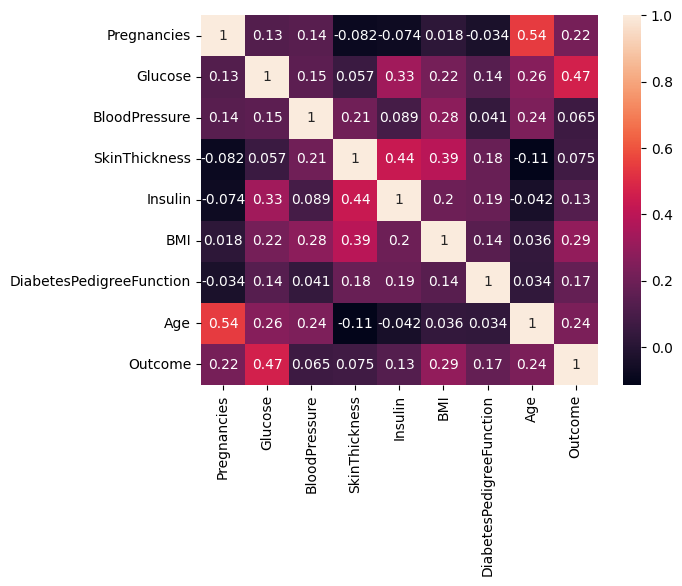

In [8]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Glucose', ylabel='BMI'>

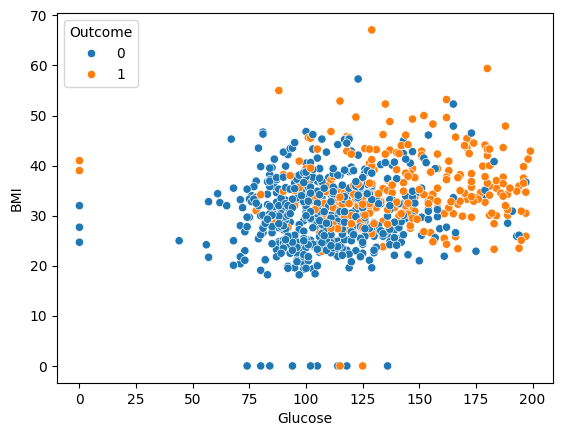

In [37]:
sns.scatterplot(data=df,x='Glucose',y='BMI',hue='Outcome')

In [10]:
X=df[['Glucose','BMI']]
y=df['Outcome']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

0.7662337662337663
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



<Axes: >

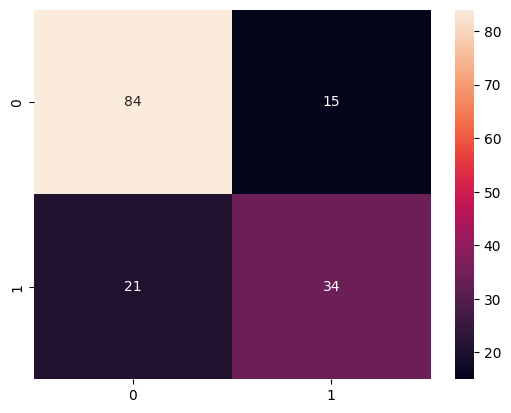

In [14]:
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

print(accuracy)
print(report)
sns.heatmap(cm,annot=True)

In [15]:
coeff=model.coef_[0]
coeff

array([0.03480462, 0.08423473])

In [19]:
a=np.linspace(X_train['Glucose'].min(),X_train['Glucose'].max(),300).reshape(-1,1)
b=np.linspace(X_train['BMI'].min(),X_train['BMI'].max(),300).reshape(-1,1)

y=model.intercept_[0]+coeff[0]*a+coeff[1]*b

z=1/(1+(np.exp(-y)))

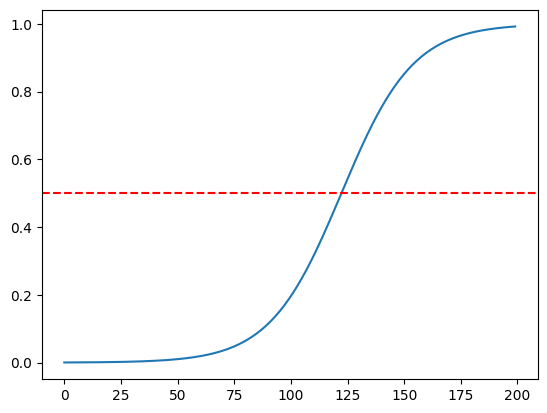

In [21]:
plt.plot(a,z)
plt.axhline(0.5,color='red',linestyle='--')

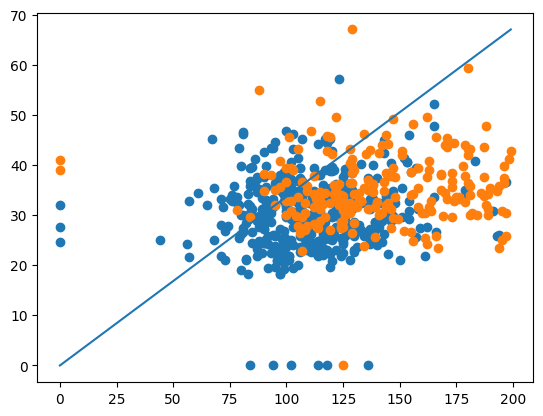

In [38]:
plt.scatter(X_train['Glucose'][y_train==0],X_train['BMI'][y_train==0])
plt.scatter(X_train['Glucose'][y_train==1],X_train['BMI'][y_train==1])
plt.plot(a,b)

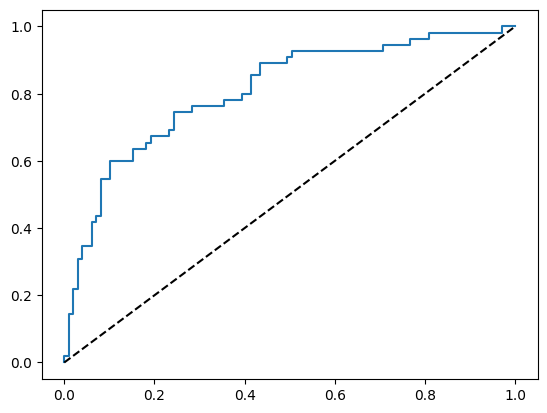

In [26]:
y_prob=model.predict_proba(X_test)[:,1]

fpr,tpr,_=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')